## Análisis exploratorio guiado
### *Caso: Venta de zapatos*
---

### 1. Librerías

In [1]:
# Librerías para tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Funcionalidad del sistema operativo
import os

### 2. Datos

In [2]:
# Ubicación del archivo
path = r'C:\Users\DELL\OneDrive\Formación\Python\Cursos\Experto en Python - UPB\Curso - UPB\Data'
file =  'zapatos.csv'

# Funciones personalizadas
w1 = lambda x: (float(x.replace('$','')))
w2 = lambda x: (float(x.replace('%',''))/100)

# Importación de datos
df = pd.read_csv(filepath_or_buffer = os.path.join(path,file),
                 sep = ',',
                 parse_dates = ['Date'],
                 converters = {'UnitPrice':w1, 'SalePrice':w1, 'Discount':w2})
df = df.astype({'Country': 'category', 'Gender':'category'})

# Resultados
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  category      
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  category      
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  float64       
 10  Discount       14967 non-null  float64       
 11  SalePrice      14967 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 1.2+ MB
None


,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
14962,65773,2016-12-31,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139.0,0.0,139.0
14963,65774,2016-12-31,United States,2181,US12,Female,12.0,42-43,10.0,149.0,0.0,149.0
14964,65775,2016-12-31,Canada,2203,CAN6,Male,10.5,43-44,10.0,179.0,0.3,125.3
14965,65776,2016-12-31,Germany,2231,GER1,Female,9.5,40,7.5,199.0,0.0,199.0
14966,65777,2016-12-31,Germany,2156,GER1,Female,6.5,37,4.5,139.0,0.1,125.1


Verificación de valores nulos

In [3]:
# No existen valores faltantes (null)
df.isnull().values.any()

False

Verificación de caracteres vacíos (espacios en una celda)

In [4]:
# No existen espacios vacíos en una celda
(df == ' ').values.any()

False

### 3. Estadísticas descriptivas

In [5]:
df.describe()

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,Discount,SalePrice
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497,164.171377,0.124013,143.987913
std,3889.598714,27.633526,1.511719,1.970014,22.940544,0.170112,35.180799
min,52389.000000,2147.000000,4.500000,2.500000,129.000000,0.000000,64.500000
25%,55648.500000,2172.000000,8.000000,6.500000,149.000000,0.000000,125.100000
50%,59092.000000,2195.000000,9.000000,8.500000,159.000000,0.000000,149.000000
75%,62433.000000,2219.000000,10.000000,9.500000,179.000000,0.200000,169.000000
max,65777.000000,2242.000000,15.000000,14.500000,199.000000,0.500000,199.000000


In [6]:
a = df.dtypes.reset_index(name = 'type')
a = a.loc[(a['type'] == 'category') | (a['type'] == 'object')].iloc[:,0].tolist()
df[a].describe()

,Country,Shop,Gender,Size (Europe)
count,14967,14967,14967,14967
unique,4,29,2,24
top,United States,GER2,Male,42-43
freq,5886,1947,8919,1968


### 4. Diferencia de precios

La diferencia entre los precios de compra y venta serán manifestadas como una nueva columna

In [7]:
df1 = df.copy()
df1['Dif_Precio'] = df1['UnitPrice'] - df1['SalePrice']
df1.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Dif_Precio
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159.0,0.0,159.0,0.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199.0,0.2,159.2,39.8
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149.0,0.2,119.2,29.8
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159.0,0.0,159.0,0.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159.0,0.0,159.0,0.0


### 5. Conversión a talla de latinoamérica 

Se asume que el cambio de talla en un zapato es lineal, por tanto la operación que contendrá la columna "Size(LATAM)" será:

$$\text{Size (LATAM)} =  \text{Size (US)} \cdot \frac{40}{9}$$

In [8]:
df1.insert(loc = len(df1.columns), column = 'Size (LATAM)', value = round(df1['Size (US)'] * (40/9),2))
df1.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Dif_Precio,Size (LATAM)
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159.0,0.0,159.0,0.0,48.89
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199.0,0.2,159.2,39.8,51.11
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149.0,0.2,119.2,29.8,42.22
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159.0,0.0,159.0,0.0,42.22
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159.0,0.0,159.0,0.0,40.00


### 5. Visualización de datos

La proporción en ventas según el género favorece a los hombres, pues generaron ingresos  de #### que representa un #### respecto a las mujeres

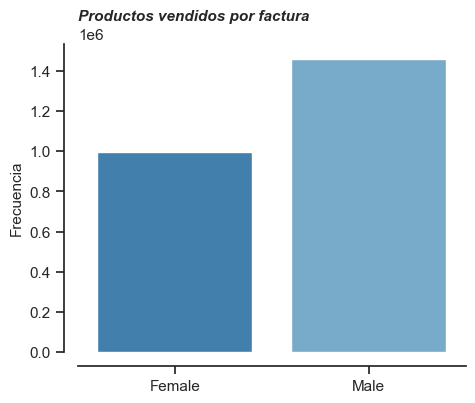

In [9]:
# Adecuación de datos
aux = df1.groupby(by = ['Gender']).sum(numeric_only = True)['UnitPrice']

# Estilo del gráfico
sns.set_theme(style = 'ticks', palette = 'tab20c', font = 'Arial')
fig, ax = plt.subplots(figsize=(5, 4))

# Tipo de gráfico
sns.barplot(x = aux.index, y = aux.values)

# Detalles adicionales
plt.title(label = 'Productos vendidos por factura', loc = 'left', size = 11, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = 'Frecuencia', size = 11)
sns.despine(offset = 10, trim = False, bottom = False)

La cantidad de productos adquiridos en cada venta (factura) se caracteriza por incluir un solo par de zapatos. Los casos que incluyen más productos por factura son muy poco frecuentes.

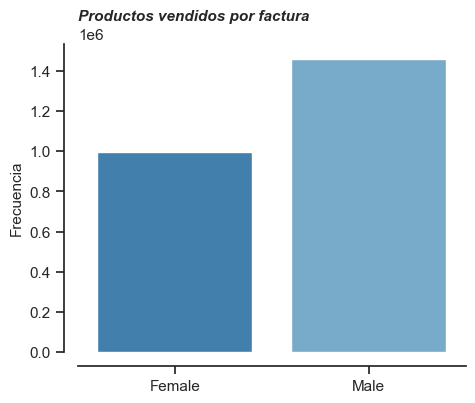

In [10]:
# Estilo del gráfico
sns.set_theme(style = 'ticks', palette = 'tab20c', font = 'Arial', font_scale = 1)
fig, ax = plt.subplots(figsize=(5, 4))

# Tipo de gráfico
sns.barplot(data = df1, x = df1['Gender'], y = df1['UnitPrice'], estimator = 'sum', errorbar = None)

# Detalles adicionales
plt.title(label = 'Productos vendidos por factura',
          loc = 'left', size = 11,
          fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = 'Frecuencia', size = 11)
plt.tick_params(axis='both', labelsize = 11)
sns.despine(offset = 10, trim = False, bottom = False)

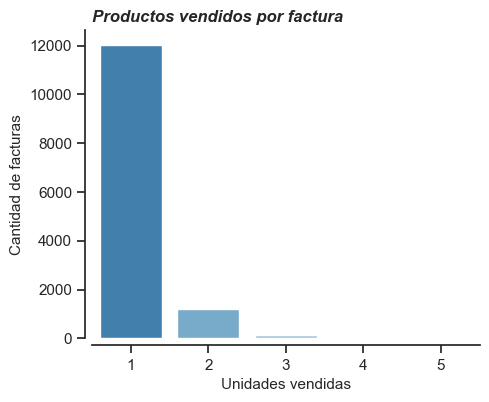

In [11]:
# Adecuación de datos
aux = df1['InvoiceNo'].value_counts().value_counts()

# Gráfico 
sns.set_theme(style = 'ticks',palette = 'tab20c', font = 'Arial', font_scale = 1)
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(x = aux.index, y = aux.values)
plt.title(label = 'Productos vendidos por factura', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = 'Unidades vendidas', size = 11)
plt.ylabel(ylabel = 'Cantidad de facturas', size = 11)
plt.tick_params(axis='both', labelsize = 11)
sns.despine(offset = 5, trim = False, bottom = False)

EEUU es el país que reporta más ingresos por calzados con un 39%, seguido por Alemania, luego Canadá y, en último lugar con un 12%, El Reino Unido.

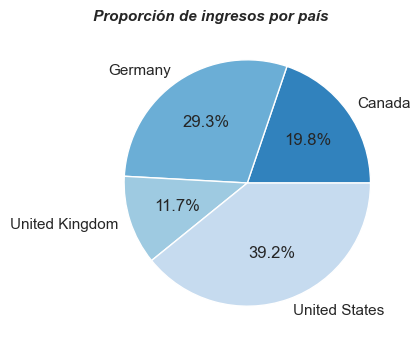

In [12]:
# Adecuación de datos
aux = df1.groupby(by = ['Country']).sum(numeric_only = True)['UnitPrice']
# Gráfico 
sns.set_theme(style = 'ticks',palette = 'tab20c', font = 'Arial', font_scale = 1)
fig, ax = plt.subplots(figsize=(5, 4))
plt.pie(aux.values, labels = aux.index, autopct = '%.1f%%')
plt.title(label = 'Proporción de ingresos por país', loc = 'left', size = 11, fontstyle = 'italic', fontweight = 'bold')
plt.show()

Se puede notar que los zapatos de hombres proporcionan un ingreso más alto respecto que los de mujeres. Asimismo, los ingresos en EEUU y Alemnaia son las más altos independientemente del género.

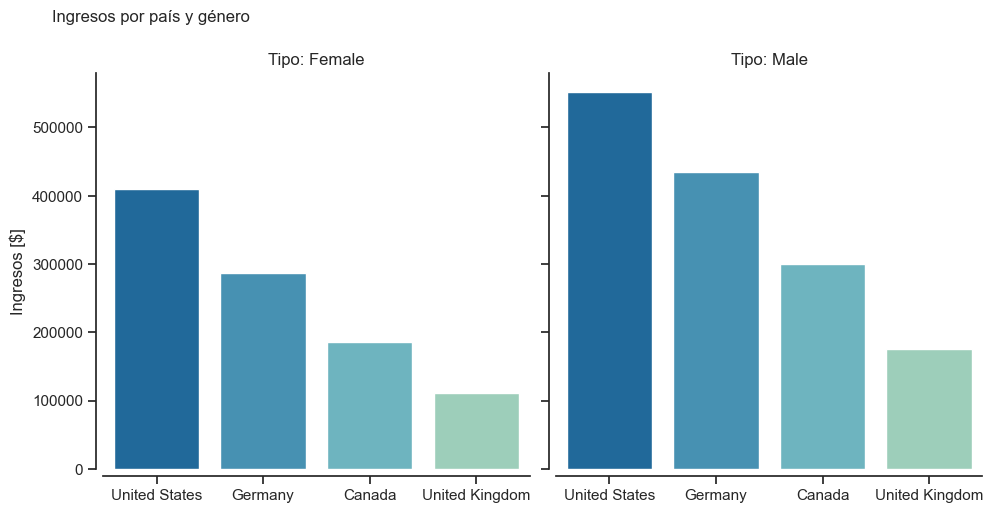

In [13]:
sns.set_theme(style = 'ticks',palette = 'GnBu_r', font = 'Arial')
bar_order = df1['Country'].value_counts(ascending = False).index.tolist()

g = sns.catplot(data = df1, x = 'Country', y = 'UnitPrice', order = bar_order,
            kind = 'bar', estimator = 'sum', col = 'Gender', errorbar = None)
g.set_axis_labels(x_var = '', y_var = 'Ingresos [$]')
g.set_titles('Tipo: {col_name}')
plt.suptitle(t = 'Ingresos por país y género', y = 1.05, x = 0.15,
             fontstyle = 'normal', fontweight = 'normal', size = 12)

sns.despine(offset = 5, trim = False, bottom = False)
plt.show()

In [14]:
(df1.groupby(by = ['Country','Gender'])
    .sum(numeric_only = True)['SalePrice']
    .reset_index(name = 'Ingresos')
    .sort_values(by = ['Country','Ingresos'], ascending = False))

,Country,Gender,Ingresos
7,United States,Male,486305.4
6,United States,Female,359674.2
5,United Kingdom,Male,154008.9
4,United Kingdom,Female,98734.8
3,Germany,Male,381750.3
2,Germany,Female,248829.6
1,Canada,Male,260826.0
0,Canada,Female,164937.9


[]

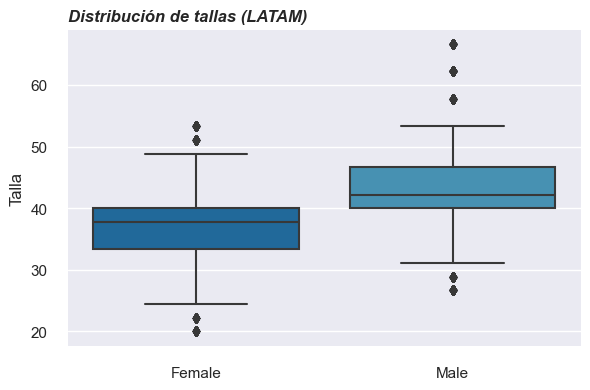

In [15]:
sns.set_theme(style = 'darkgrid',palette = 'GnBu_r', font = 'Arial')

sns.catplot(data = df1, x = 'Gender', y = 'Size (LATAM)', kind = 'box', height = 4, aspect = 1.5)

plt.title(label = 'Distribución de tallas (LATAM)', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = 'Talla', size = 12)
sns.despine(offset = 5, trim = False, bottom = False)
plt.plot()

[]

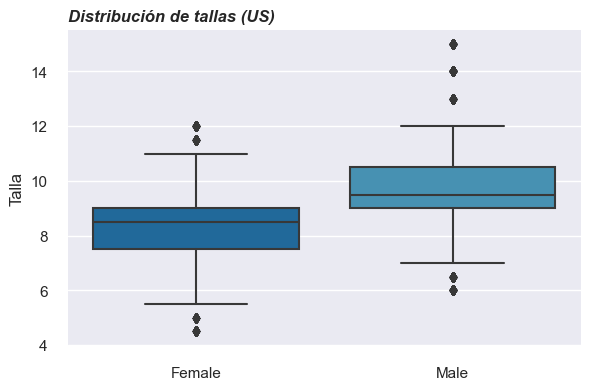

In [16]:
sns.set_theme(style = 'darkgrid',palette = 'GnBu_r', font = 'Arial')

sns.catplot(data = df1, x = 'Gender', y = 'Size (US)', kind = 'box', height = 4, aspect = 1.5)

plt.title(label = 'Distribución de tallas (US)', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = 'Talla', size = 12)
sns.despine(offset = 5, trim = False, bottom = False)
plt.plot()

In [17]:
df1.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Dif_Precio,Size (LATAM)
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159.0,0.0,159.0,0.0,48.89
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199.0,0.2,159.2,39.8,51.11
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149.0,0.2,119.2,29.8,42.22
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159.0,0.0,159.0,0.0,42.22
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159.0,0.0,159.0,0.0,40.00


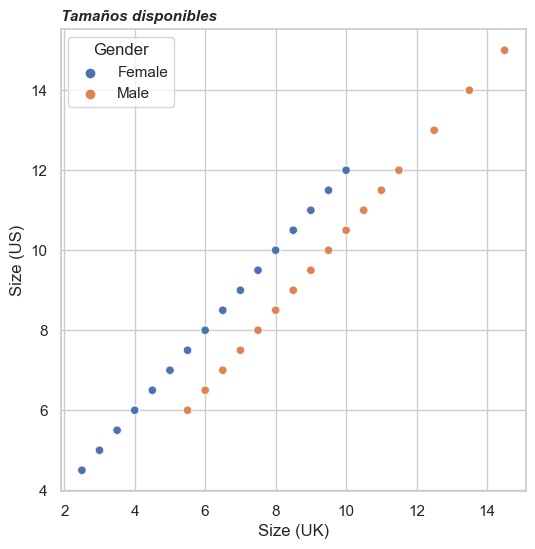

In [18]:
# Estilo del gráfico
#sns.set_theme()
sns.set_theme(style = 'whitegrid', font = 'Arial', font_scale = 1)
fig, ax = plt.subplots(figsize=(6, 6))

# Tipo de gráfico
sns.scatterplot(data = df1, x = 'Size (UK)', y = 'Size (US)', hue = 'Gender')

# Detalles adicionales
plt.title(label = 'Tamaños disponibles',
          loc = 'left', size = 11,
          fontstyle = 'italic', fontweight = 'bold')
#plt.xlabel(xlabel = None)
#plt.ylabel(ylabel = 'Frecuencia', size = 11)
#plt.tick_params(axis='both', labelsize = 11)
#sns.despine(offset = 10, trim = False, bottom = False)
plt.show()

### 6. Preguntas de análisis

**¿Cuánto cuesta en promedio un zapato para hombre en Estados Unidos?**

El precio nominal de un par de zapatos en EEUU es de 163.03 dólares, pero si se adquieren con descuento el precio promedio sería 143.58 dólares.

In [19]:
(df1.groupby(by = ['Gender','Country'], sort = True)
 .mean(numeric_only = True)[['UnitPrice','Discount','SalePrice']])

UnitPrice  Discount   SalePrice
Gender Country                                         
Female Canada          164.755968  0.114854  145.833687
       Germany         164.603448  0.131379  143.005517
       United Kingdom  164.619469  0.117699  145.626549
       United States   164.114046  0.124130  143.927251
Male   Canada          164.650741  0.131796  143.232290
       Germany         163.875566  0.123416  143.948077
       United Kingdom  166.252125  0.125496  145.428612
       United States   163.030115  0.120283  143.579982

**¿En qué país se venden los zapatos más caros?**

Los zapatos más caros tienen un precio de 199 $. Este precio de venta, no tinene descuento y se puede encontrar en los cuatro paises del dataset, sin embargo, EEUU tiene más registros de ventas respecto a los demás paises.

In [20]:
df1['UnitPrice'].max()

199.0

In [21]:
df1.loc[df1['SalePrice'] == df1['UnitPrice'].max(), 'Country'].value_counts()

United States     432
Germany           288
Canada            252
United Kingdom    171
Name: Country, dtype: int64

In [22]:
df1.loc[df1['SalePrice'] == df1['UnitPrice'].max(), 'Discount'].value_counts()

0.0    1143
Name: Discount, dtype: int64

In [23]:
(df1.groupby(by = ['Gender','Country'], sort = True)
 .max(numeric_only = True)[['SalePrice']])

SalePrice
Gender Country                  
Female Canada              199.0
       Germany             199.0
       United Kingdom      199.0
       United States       199.0
Male   Canada              199.0
       Germany             199.0
       United Kingdom      199.0
       United States       199.0

**¿En qué tienda (Variable Shop) se venden los zapatos más baratos?**

In [24]:
df1['UnitPrice'].min()

129.0

In [25]:
df1.loc[df1['UnitPrice'] == df1['UnitPrice'].min(),['Country','Shop']].value_counts().head()

Country        Shop
Germany        GER2    255
               GER1    204
United States  US12    135
Canada         CAN6    111
United States  US13    111
dtype: int64

**¿En qué fecha se hizo el descuento más alto en el Reino Unido?**

El descuento más alto para el Reino Unido se llevó a cabo entre el 26/01/2014 y 17/12/2016

In [26]:
aux = df1.loc[(df1['Discount'] == df1['Discount'].max()) & (df1['Country'] == 'United Kingdom'),['Date']]
(aux.min(), aux.max())

(Date   2014-01-26
 dtype: datetime64[ns],
 Date   2016-12-17
 dtype: datetime64[ns])

**¿De qué talla americana (Variable Size(US)) es el zapato femenino más grande?**

El zapato femenino más grade para mujer es 12

In [27]:
df1.loc[(df1['Gender'] == 'Female'),['Size (US)']].max()

Size (US)    12.0
dtype: float64

**¿En qué país se han hecho más descuentos?**

Se hicieron más decuentos en EEUU

In [28]:
df1.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Dif_Precio,Size (LATAM)
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159.0,0.0,159.0,0.0,48.89
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199.0,0.2,159.2,39.8,51.11
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149.0,0.2,119.2,29.8,42.22
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159.0,0.0,159.0,0.0,42.22
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159.0,0.0,159.0,0.0,40.00


In [29]:
# Creando una nueva columna
df2 = df1.copy()
df2['Discount_m'] = df2['SalePrice']*df2['Discount']
df2.groupby(by = ['Country']).sum(numeric_only = True)['Discount_m'].sort_values(ascending = False)

Country
United States     74834.58
Germany           57727.89
Canada            38768.55
United Kingdom    22973.55
Name: Discount_m, dtype: float64

In [30]:
# SIn crear una nueva columna
aux = df1.loc[df1['Country'] == 'United States']
sum(aux['SalePrice']*aux['Discount'])

74834.57999999993

**Basándose solo en el precio (Sale Price), ¿en qué país prefería comprar una mujer que calza talla 6.5 americana?**

SI se toma la media como un decisor, es más recomendable comprar en EEUU. Si tomamos el valor mínimo, es mejor en Canadá.

In [31]:
(df1.loc[(df1['Size (US)']== 6.5) & (df1['Gender'] == 'Female')]
 .groupby(by = ['Country'])
 .mean(numeric_only= True)['SalePrice']
 .sort_values(ascending = True))

Country
United States     133.945161
Germany           139.825000
Canada            142.388235
United Kingdom    150.475000
Name: SalePrice, dtype: float64

In [32]:
(df1.loc[(df1['Size (US)']== 6.5) & (df1['Gender'] == 'Female')]
 .groupby(by = ['Country'])
 .min(numeric_only= True)['SalePrice']
 .sort_values(ascending = True))

Country
Canada            64.5
Germany           74.5
United States     74.5
United Kingdom    97.3
Name: SalePrice, dtype: float64

**Gráficas de la evolución de ventas en cada país e interprete el mercado que tiene mejor perspectiva de ventas.**

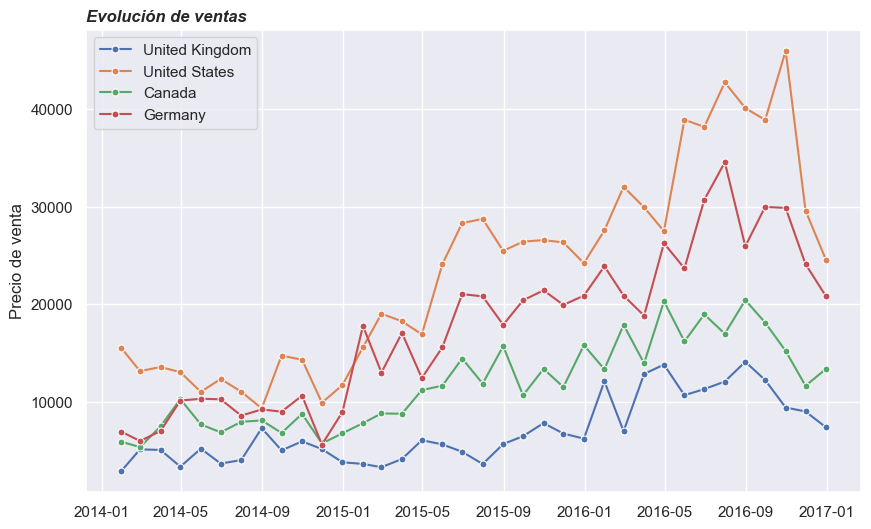

In [33]:
sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

df3 = df1.copy()
for i in df3['Country'].unique().tolist():
    aux = df3.copy().loc[df3['Country'] == i]
    aux = aux.set_index('Date')
    aux = aux.resample(rule = 'M').sum(numeric_only = True)
    sns.lineplot(data = aux, x = 'Date', y = 'SalePrice', label = i,
                 marker = ".", linestyle = 'solid', markersize = 10)

ax.legend()
plt.title(label = 'Evolución de ventas', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = 'Precio de venta', size = 12)
plt.show()

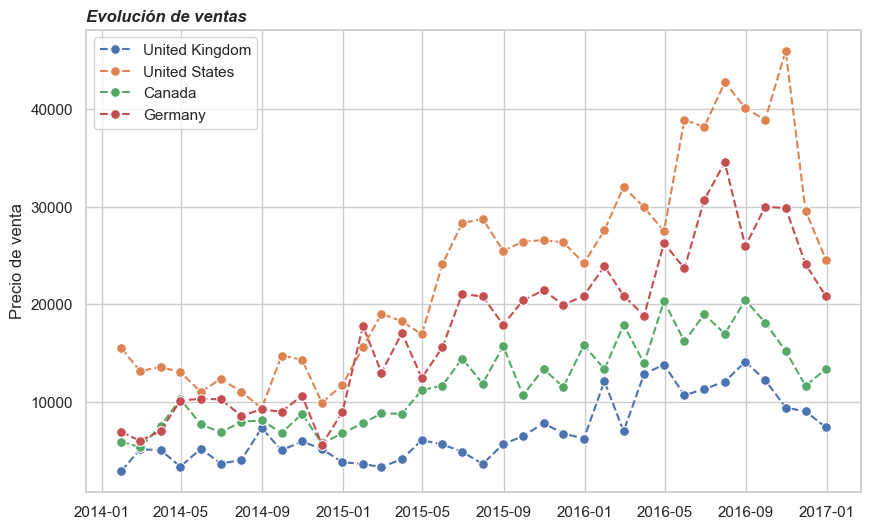

In [34]:
sns.set_theme(style = 'whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

df3 = df1.copy()
for i in df3['Country'].unique().tolist():
    aux = df3.copy().loc[df3['Country'] == i]
    aux = aux.set_index('Date')
    aux = aux.resample(rule = 'M').sum(numeric_only = True)
    sns.lineplot(data = aux, x = 'Date', y = 'SalePrice', label = i,
                 marker = "o", linestyle = 'dashed', markersize = 7)

ax.legend()
plt.title(label = 'Evolución de ventas', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = 'Precio de venta', size = 12)
plt.show()

In [35]:
df3 = df1.copy()
df3['year'] = pd.DatetimeIndex(df1['Date']).year
df3['month'] = pd.DatetimeIndex(df1['Date']).month

df3 = pd.pivot_table(df3, index = ['year','month'],
                       values = ['SalePrice'],
                       columns = ['Country'],
                       aggfunc = np.sum)
df3

SalePrice                                      
Country       Canada  Germany United Kingdom United States
year month                                                
2014 1        5895.7   6931.7         2924.9       15500.0
     2        5358.4   5982.3         5122.5       13149.3
     3        7481.1   6999.9         5065.8       13570.2
     4       10273.6  10132.4         3348.1       13043.9
     5        7682.2  10310.0         5195.1       11021.5
     6        6870.8  10260.6         3667.6       12349.4
     7        7946.3   8584.5         4027.6       11039.4
     8        8095.1   9219.0         7301.9        9328.3
     9        6810.4   8987.1         5024.5       14740.4
     10       8765.5  10630.7         5945.4       14316.8
     11       5733.0   5614.7         5153.1        9908.3
     12       6774.5   8955.9         3803.6       11721.6
2015 1        7806.3  17779.9         3630.0       15589.5
     2        8810.9  13000.6         3295.8       19036.8
     3        8777.3  17065.2         4133.8       18260.3
     4       11201.1  12439.8         6066.0       16916.8
     5       11654.7  15588.3         5633.9       24107.7
     6       14441.3  21049.7         4876.1       28335.3
     7       11866.5  20813.8         3622.4       28760.9
     8       15707.0  17901.4         5664.1       25484.0
     9       10669.4  20410.9         6476.7       26430.7
     10      13379.6  21431.6         7813.6       26586.0
     11      11514.4  19941.2         6746.4       26349.4
     12      15810.4  20893.0         6222.0       24221.7
2016 1       13341.3  23900.6        12106.5       27586.4
     2       17887.7  20895.4         6983.0       32053.5
     3       13954.7  18835.7        12856.1       29948.0
     4       20308.3  26267.7        13819.7       27510.3
     5       16199.0  23689.8        10678.4       38927.5
     6       18968.3  30719.1        11306.9       38204.0
     7       16983.7  34568.1        12081.0       42768.8
     8       20432.9  25953.9        14110.3       40129.3
     9       18128.0  29998.9        12234.4       38911.8
     10      15212.9  29883.7         9415.4       46003.6
     11      11647.1  24125.5         9011.2       29620.2
     12      13374.5  20817.3         7379.9       24548.0